# Dataset Loading

In [ ]:
import pandas as pd


In [ ]:
users= pd.read_csv('/content/drive/MyDrive/users.csv')

In [ ]:
flights= pd.read_csv('/content/drive/MyDrive/flights.csv')

In [ ]:
hotels= pd.read_csv('/content/drive/MyDrive/hotels.csv')

# Basic EDA

In [ ]:
users.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [ ]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [ ]:
hotels.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [ ]:
users.isnull().sum()

,0
code,0
company,0
name,0
gender,0
age,0


In [ ]:
flights.isnull().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price,0
time,0
distance,0
agency,0
date,0


In [ ]:
hotels.isnull().sum()

,0
travelCode,0
userCode,0
name,0
place,0
days,0
price,0
total,0
date,0


**The data has no nulls.**

In [ ]:
users.duplicated().value_counts()

,count
False,1340


In [ ]:
flights.duplicated().value_counts()

,count
False,271888


In [ ]:
hotels.duplicated().value_counts()

,count
False,40552


In [ ]:
users.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [ ]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [ ]:
hotels.columns

Index(['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total',
       'date'],
      dtype='object')

**The tables have no duplicate rows.**

In [ ]:
(users['age']>0).value_counts()

,count
age,
True,1340


In [ ]:
(flights['price']>0).value_counts()

,count
price,
True,271888


In [ ]:
(flights['distance']>0).value_counts()

,count
distance,
True,271888


In [ ]:
(hotels['days']>=1).value_counts()

,count
days,
True,40552


**We have no rows with unusual data.**

# Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Gender distribution

gender_counts = users['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

fig = px.bar(
    gender_counts,
    x="gender",
    y="count",
    title="Gender Distribution",
    labels={"gender": "Gender", "count": "Count"}
)
fig.show()

In [ ]:
# Age distribution

age_counts = users['age'].value_counts().reset_index()
age_counts.columns = ['age', 'count']
age_counts = age_counts.sort_values('age')

# Create bar chart
fig = px.bar(
    age_counts,
    x="age",
    y="count",
    text="count",
    title="User Age Distribution (Separated Bars)",
    labels={"age": "Age", "count": "Number of Users"}
)
fig.show()

In [ ]:
# Flights by type
flight_counts = flights['flightType'].value_counts().reset_index()
flight_counts.columns = ['flightType', 'count']

fig = px.bar(
    flight_counts,
    x="flightType",
    y="count",
    title="Flights by Type",
    labels={"flightType": "Flight Type", "count": "Count"}
)
fig.show()

In [ ]:
# Top routes (from → to)

top_routes = flights.groupby(['from','to']).size().nlargest(10).reset_index(name="count")
top_routes['route'] = top_routes['from'] + " → " + top_routes['to']

fig = px.bar(
    top_routes,
    x="count",
    y="route",
    orientation="h",
    title="Top 10 Flight Routes",
    labels={"count": "Number of Flights", "route": "Route"}
)
fig.show()

In [ ]:
# Price distribution

fig = px.box(
    flights,
    y="price",
    title="Flight Price Distribution",
    labels={"price": "Price"}
)
fig.show()

In [ ]:
# Most booked hotels

top_hotels = hotels['name'].value_counts().nlargest(10).reset_index()
top_hotels.columns = ['Hotel', 'Count']

fig = px.bar(
    top_hotels,
    x="Hotel",
    y="Count",
    title="Top 10 Hotels Booked"
)
fig.show()


In [ ]:
# Average spending per stay (by place)

avg_spend_place = hotels.groupby('place')['total'].mean().nlargest(10).reset_index()

fig = px.bar(
    avg_spend_place,
    x="place",
    y="total",
    title="Avg Hotel Spend by Place",
    labels={"place": "Place", "total": "Average Spend"}
)
fig.show()


In [ ]:
# Length of stay distribution

fig = px.histogram(
    hotels,
    x="days",
    nbins=10,
    title="Length of Stay (Days)",
    labels={"days": "Number of Days"}
)
fig.show()

In [ ]:
# Merge users + hotels to see spending by age group

merged_hotels = hotels.merge(users, left_on='userCode', right_on='code')
merged_hotels['age_group'] = pd.cut(
    merged_hotels['age'],
    bins=[0,18,30,45,60,100],
    labels=["0-18","19-30","31-45","46-60","60+"]
)
avg_spend_age = merged_hotels.groupby('age_group')['total'].mean().reset_index()

fig = px.bar(
    avg_spend_age,
    x="age_group",
    y="total",
    title="Avg Hotel Spend by Age Group",
    labels={"age_group": "Age Group", "total": "Average Spend"}
)
fig.show()

/tmp/ipython-input-1148149434.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Feature Engineering

**Date-time Handling**

In [ ]:
# convert timestamp column to date time dtype

flights['date'] = pd.to_datetime(flights['date'])
hotels['date'] = pd.to_datetime(hotels['date'])

In [ ]:
# creating features from date column

flights['year'] = flights['date'].dt.year
flights['month'] = flights['date'].dt.month
flights['day'] = flights['date'].dt.day
flights['day_of_week'] = flights['date'].dt.dayofweek
flights['is_weekend'] = flights['day_of_week'].isin([5,6]).astype(int)

In [ ]:
flights = flights.drop(columns=['date'])

In [ ]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,year,month,day,day_of_week,is_weekend
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019,9,26,3,0
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019,9,30,0,0
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019,10,3,3,0
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019,10,4,4,0
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019,10,10,3,0


# Flight Price Prediction Model

In [ ]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   travelCode  271888 non-null  int64         
 1   userCode    271888 non-null  int64         
 2   from        271888 non-null  object        
 3   to          271888 non-null  object        
 4   flightType  271888 non-null  object        
 5   price       271888 non-null  float64       
 6   time        271888 non-null  float64       
 7   distance    271888 non-null  float64       
 8   agency      271888 non-null  object        
 9   date        271888 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 20.7+ MB


In [ ]:
# drop columns

flights = flights.drop(columns=['travelCode', 'userCode'])

In [ ]:
flights.columns

Index(['from', 'to', 'flightType', 'price', 'time', 'distance', 'agency',
       'year', 'month', 'day', 'day_of_week', 'is_weekend'],
      dtype='object')

**Linear Regression baseline Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


X = flights.drop(columns=['price'])
y = flights['price']

# Categorical & numerical features

categorical_cols = ['from', 'to', 'flightType', 'agency']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['from', 'to', 'flightType',
                                                   'agency']),
                                                 ('num', 'passthrough',
                                                  ['time', 'distance', 'year',
                                                   'month', 'day',
                                                   'day_of_week',
                                                   'is_weekend'])])),
                ('regressor', LinearRegression())])

In [ ]:
#  Predictions
y_pred = model.predict(X_test)



In [ ]:
#  Evaluation

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Root Mean Squared Error: 103.14739616663424
R² Score: 0.9192574210593604


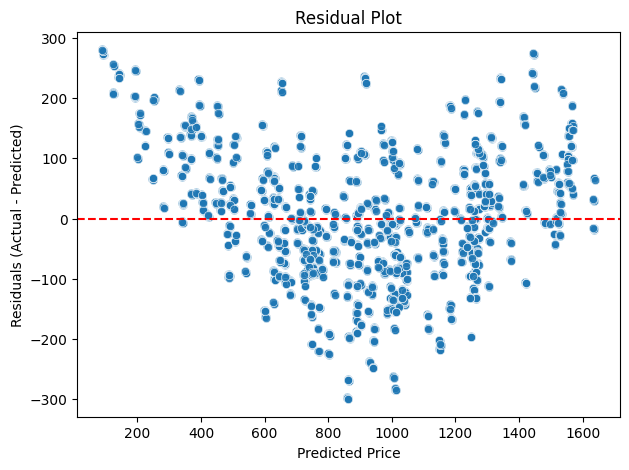

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Residual Plot (Error vs Predicted)

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=y_test - y_pred, alpha=0.8)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

The residuals are not randomly scattered around the zero line.

The model is not capturing some non-linear relationships in the data. A simple linear model might be underfitting.

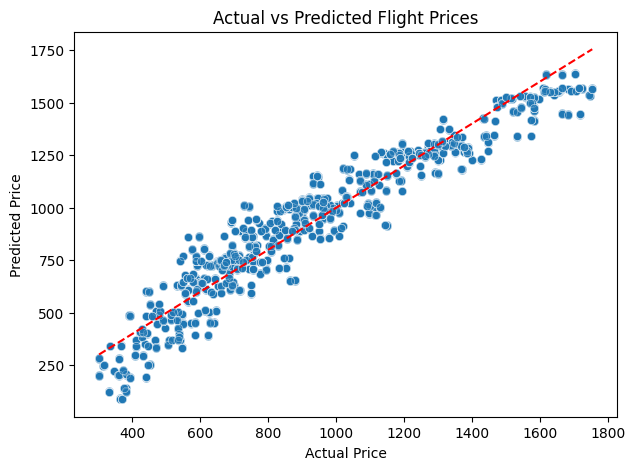

In [ ]:
# Actual vs Predicted Plot

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect fit line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.show()


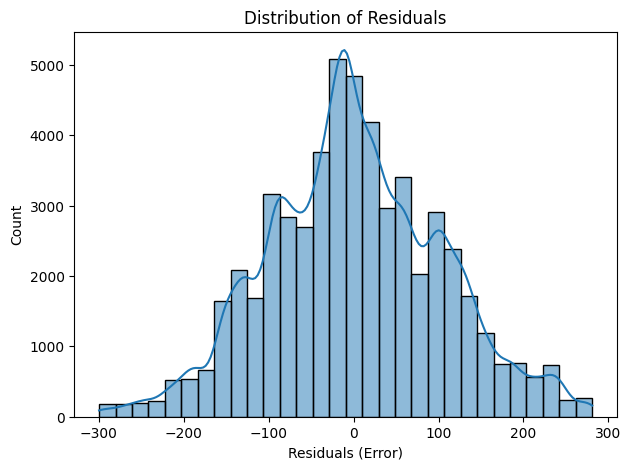

In [ ]:

# Error Distribution (Residual Histogram)

plt.figure(figsize=(7,5))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Residuals (Error)")
plt.title("Distribution of Residuals")
plt.show()

The residuals are mostly centered around zero with a near-symmetric, bell-shaped distribution, showing that the model predictions are generally accurate.

However, slight skewness and a few outliers indicate room for improvement.

**Tree-based Linear Regression Models**

**Random Forest Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X = flights.drop(columns=['price'])
y = flights['price']

# encode categorical columns

categorical_cols = ['from', 'to', 'flightType', 'agency']
numeric_cols = ['time', 'distance', 'day', 'month', 'year', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Random forest pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        random_state=42,
        n_jobs=-1
    ))
])


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# train the model

model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['from', 'to', 'flightType',
                                                   'agency']),
                                                 ('num', 'passthrough',
                                                  ['time', 'distance', 'day',
                                                   'month', 'year',
                                                   'day_of_week'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_split=10,
                                       n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [ ]:
# predict on test data

y_pred = model.predict(X_test)

In [ ]:
# evaluation

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R² Score: {r2:.4f}")

Random Forest RMSE: 3.66
Random Forest R² Score: 0.9999


In [ ]:
# adjusted r2-score

def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    return adj_r2

adj_r2 = adjusted_r2_score(y_test, y_pred, X_test.shape[1])
print("Adjusted R² Score:", adj_r2)

Adjusted R² Score: 0.9998982807889373


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

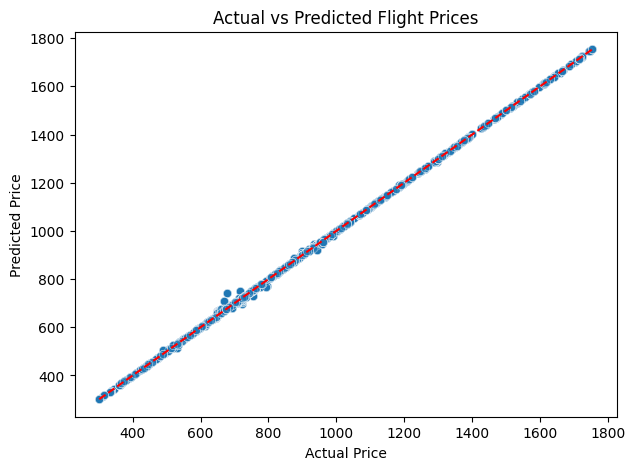

In [ ]:
# Actual vs Predicted Plot

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.show()


In [ ]:
# save model to drive

import joblib
from google.colab import drive

model_path = '/content/drive/MyDrive/flight_price_rf_model.pkl'

joblib.dump(model, model_path)
print(f"Model saved to: {model_path}")

Model saved to: /content/drive/MyDrive/flight_price_rf_model.pkl


**Gradient Boost Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X = flights.drop("price", axis=1)
y = flights["price"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# encode

categorical_cols = ['from', 'to', 'flightType', 'agency']
numeric_cols = ['time', 'distance', 'day', 'month', 'year', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

# pipeline
gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ))
])

# train model
gb_model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['from', 'to', 'flightType',
                                                   'agency']),
                                                 ('num', StandardScaler(),
                                                  ['time', 'distance', 'day',
                                                   'month', 'year',
                                                   'day_of_week'])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=5, n_estimators=300,
                                           random_state=42))])

In [ ]:
# prediction
y_pred = gb_model.predict(X_test)

In [ ]:
# evaluation

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boost RMSE: {rmse:.2f}")
print(f"Gradient Boost R²: {r2:.4f}")

Gradient Boost RMSE: 7.96
Gradient Boost R²: 0.9995


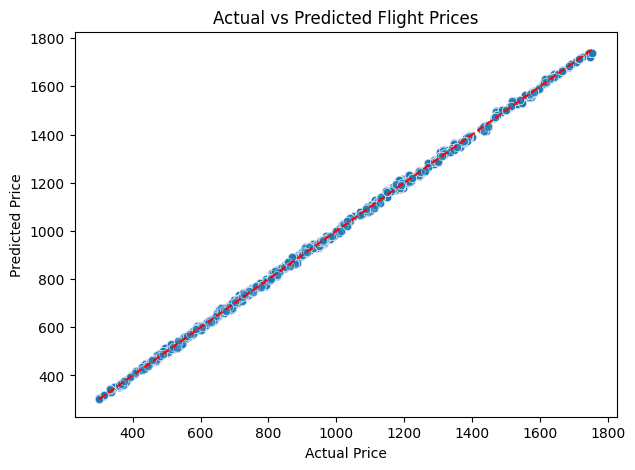

In [ ]:
# Actual vs Predicted Plot

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.show()


In [ ]:
# save model to drive

import joblib
from google.colab import drive

model_path = '/content/drive/MyDrive/flight_price_gb_model.pkl'

joblib.dump(model, model_path)
print(f"Model saved to: {model_path}")

Model saved to: /content/drive/MyDrive/flight_price_gb_model.pkl
